In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model, metrics 
import statsmodels.api as sm  # for regression problem
import os
import sys



In [2]:
#boston = datasets.load_boston(return_X_y=False)
os.getcwd()


'C:\\Users\\HP\\DataScience'

In [3]:
# load the boston dataset 
#boston = datasets.load_boston(return_X_y=False) 
#data = datasets.load_boston()  
# defining feature matrix(X) and response vector(y) 
#X = boston.data 
#y = boston.target 

diabetes = datasets.load_diabetes()
data = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
X_df=pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])


In [6]:
df.columns


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [7]:
## Without a constant

import statsmodels.api as sm
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
#X = df["RM"]
y = target["MEDV"]
#x = sm.add_constant(x)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.100
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           4.72e-07
Time:                        09:20:45   Log-Likelihood:                -2873.9
No. Observations:                 442   AIC:                             5768.
Df Residuals:                     432   BIC:                             5809.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.0122    179.967     -0.056      0.956    -363.731     343.707
sex         -239.8191    184.404     -1.301      0.194    -602.259     122.621
bmi          519.8398    200.401      2.594      0.010     125.957     913.723
bp           324.3904    197.053      1.646      0.100     -62.912     711.692
s1          -792.1842   1255.066     -0.631      0.528   -3258.979    1674.611
s2           476.7458   1021.183      0.467      0.641   -1530.360    2483.851
s3           101.0446    640.155      0.158      0.875   -1157.162    1359.251
s4           177.0642    486.370      0.364      0.716    -778.882    1133.010
s5           751.2793    517.774      1.451      0.148    -266.391    1768.950
s6            67.6254    198.747      0.340      0.734    -323.005     458.256
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   0.223
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#with constant with all features
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
X = sm.add_constant(X)
#y = target["MEDV"]
y = diabetes['target']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           3.83e-62
Time:                        09:20:45   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#output = model.summary
#type(output)


In [10]:
#output_df = pd.DataFrame(output)
diabetes['feature_names']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
#with constant with all features
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']] 
X = sm.add_constant(X)
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           3.83e-62
Time:                        09:20:46   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#9.10121*1000*2-34.67
#9.10121*1000*9-34.67

In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [14]:
#df1.copy(df2)

10


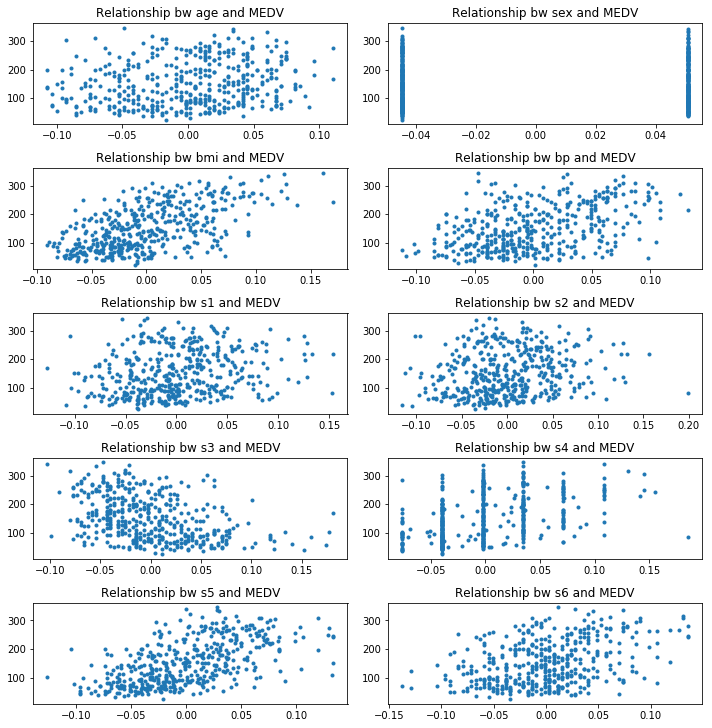

In [15]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
       # plt.plot(df2[col],df2["MEDV"],marker='.',linestyle='none')
        plt.plot(df[col],y,marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()
        
colnames = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
plotFeatures(colnames,"Relationship bw %s and MEDV")


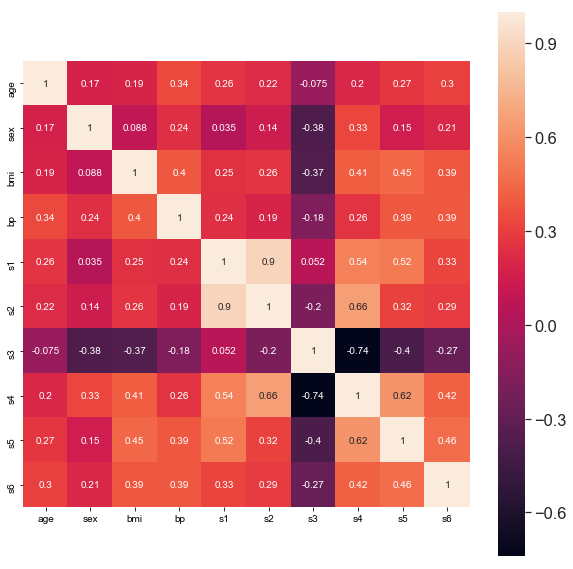

In [16]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()


In [17]:
def predictPrice(x,theta):
    return np.dot(x,theta)

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2


In [18]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()


In [19]:
def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    #Y = df["MEDV"]
    Y = y
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')


In [20]:
gradientDescentLinearRegression()

KeyError: 'RM'

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,  random_state=1) 


In [ ]:
print(X)


In [ ]:
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 


In [ ]:
pred=reg.predict(X_test)


In [ ]:
pred_train=reg.predict(X_train)


In [ ]:
#training metrics
from sklearn import metrics

print(metrics.mean_absolute_error(y_train,pred_train))

print(metrics.mean_squared_error(y_train,pred_train))

print(metrics.mean_absolute_error(y_test,pred))

print(metrics.mean_squared_error(y_test,pred))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3,include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(0,14)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

In [ ]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()


In [ ]:
X.to_csv("F:\\DataScience\\X_diabetes.csv", index=False)

In [ ]:
X = pd.read_csv("F:\\DataScience\\X_diabetes.csv")

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2,include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(0,13)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

In [ ]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_poly, y, test_size=0.4,  random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
poly = LinearRegression(normalize=True)

  
# train the model using the training sets 
poly.fit(X_train, y_train) 


In [ ]:
pred_train=poly.predict(X_train)
pred_test=poly.predict(X_test)


In [ ]:
#training metrics

print(metrics.mean_absolute_error(y_train,pred_train))

print(metrics.mean_squared_error(y_train,pred_train))

#testing metrics

print(metrics.mean_absolute_error(y_test,pred_test))

print(metrics.mean_squared_error(y_test,pred_test))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3,include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(0,13)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

In [ ]:
#power of 3
#training metrics 

print(metrics.mean_absolute_error(y_train,pred_train))

print(metrics.mean_squared_error(y_train,pred_train))

#testing metrics

print(metrics.mean_absolute_error(y_test,pred_test))

print(metrics.mean_squared_error(y_test,pred_test))


In [ ]:
diabetes = datasets.load_diabetes()


In [ ]:
X_new=diabetes.data
Y_new=diabetes.target


In [ ]:
X_new
Y_new
diabetes